In [1]:
import networkx as nx
import cell_flower as cf
import pandas as pd
import numpy as np

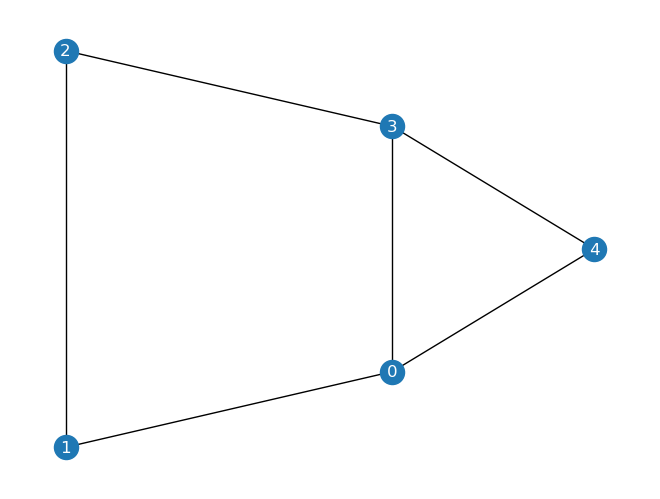

In [2]:
# Initialize underlying graph
CC = cf.CellComplex([(0,1), (1,2), (2,3), (0,3), (3,4), (0,4)])
G = nx.from_edgelist(CC.get_cells(1))

embed = nx.spectral_layout(G)
nx.draw(G, embed)
_ = nx.draw_networkx_labels(G, embed, font_color='white')

In [3]:
# Cell boundary maps expressed as pd.Series

# Cell (0,1,2,3)
square_cell = pd.Series({
        (0,1): 1,
        (1,2): 1,
        (2,3): 1,
        (0,3): -1
    }, index=G.edges).fillna(0).sort_index()

# Cell (0,3,4)
triangle_cell = pd.Series({
        (0,3): 1,
        (3,4): 1,
        (0,4): -1
    }, index=G.edges).fillna(0).sort_index()

# Flows

flow1 = square_cell * 1 - triangle_cell * .5
flow2 = square_cell * .3 + triangle_cell * .6

flows = np.array([flow1.to_numpy(), flow2.to_numpy()])

In [4]:
# Helper functions

def graph_flow_to_weighted_digraph(G: nx.Graph, flow: pd.Series) -> nx.DiGraph:
    D = nx.DiGraph()
    D.add_nodes_from(G)
    for u, v in G.edges:
        f = flow[(u,v)]
        if f > 0:
            D.add_edge(u, v, flow=f)
        else:
            D.add_edge(v, u, flow=-f)
    return D

def plot_weight_digraph(D, **kwargs):
    flow_map = nx.get_edge_attributes(D, 'flow')
    nx.draw(D, embed, edgelist=[], **kwargs)
    edges = [e for e in D.edges if flow_map[e] != 0]
    widths = [flow_map[e] * 2 for e in edges]
    nx.draw_networkx_edges(D, embed, edges, width=widths, **kwargs)
    edges = [e for e in D.edges if flow_map[e] == 0]
    nx.draw_networkx_edges(D, embed, edges, style='--', width=2, arrows=False)
    _ = nx.draw_networkx_labels(G, embed, font_color='white')

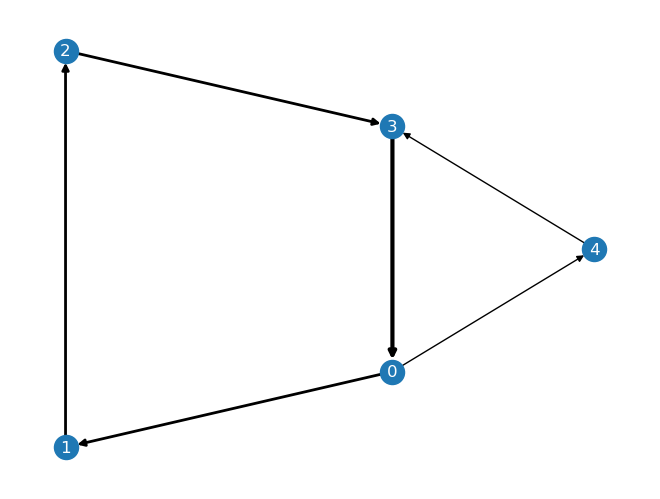

In [5]:
# Visualization of the two flows
plot_weight_digraph(graph_flow_to_weighted_digraph(G, flow1))

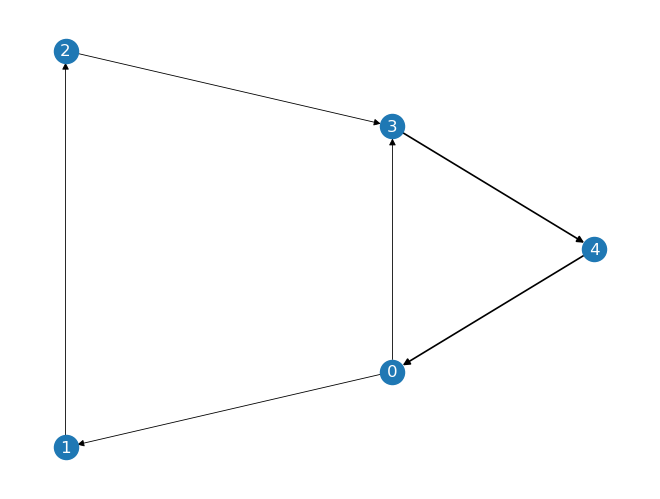

In [6]:

plot_weight_digraph(graph_flow_to_weighted_digraph(G, flow2))

In [8]:
CC_prime = cf.cell_inference_approximation(CC, flows, 2, 2, n_clusters=5)
# Check to see the cells are correct
CC_prime.get_cells(2)

[(0, 3, 4), (0, 1, 2, 3)]